In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"c:\Users\NANA\Downloads\healthcare_noshows.csv")

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0


In [4]:
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       106987 non-null  float64
 1   AppointmentID   106987 non-null  int64  
 2   Gender          106987 non-null  object 
 3   ScheduledDay    106987 non-null  object 
 4   AppointmentDay  106987 non-null  object 
 5   Age             106987 non-null  int64  
 6   Neighbourhood   106987 non-null  object 
 7   Scholarship     106987 non-null  bool   
 8   Hypertension    106987 non-null  bool   
 9   Diabetes        106987 non-null  bool   
 10  Alcoholism      106987 non-null  bool   
 11  Handcap         106987 non-null  bool   
 12  SMS_received    106987 non-null  bool   
 13  Showed_up       106987 non-null  bool   
 14  Date.diff       106987 non-null  int64  
dtypes: bool(7), float64(1), int64(3), object(4)
memory usage: 7.2+ MB


In [6]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
Showed_up         0
Date.diff         0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Date.diff
count,1.069870e+05,1.069870e+05,106987.000000,106987.000000
mean,1.472814e+14,5.675434e+06,38.316085,10.166721
std,2.558267e+14,7.133274e+04,22.466214,15.263508
min,3.921784e+04,5.030230e+06,1.000000,-6.000000
25%,4.173523e+12,5.640490e+06,19.000000,0.000000
50%,3.172463e+13,5.680744e+06,38.000000,4.000000
75%,9.433600e+13,5.725634e+06,56.000000,14.000000
max,9.999816e+14,5.790484e+06,115.000000,179.000000


In [9]:
df.nunique()

PatientId          60270
AppointmentID     106987
Gender                 2
ScheduledDay         110
AppointmentDay        27
Age                  102
Neighbourhood         81
Scholarship            2
Hypertension           2
Diabetes               2
Alcoholism             2
Handcap                2
SMS_received           2
Showed_up              2
Date.diff            131
dtype: int64

In [10]:
df = df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1)

In [11]:
df1 = df.copy()
from sklearn.preprocessing import LabelEncoder


categorical_columns = ['Gender', 'Neighbourhood', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up']

label = LabelEncoder()

for col in categorical_columns:
    df1[col] = label.fit_transform(df1[col])


In [12]:
correlation = df1.corr()

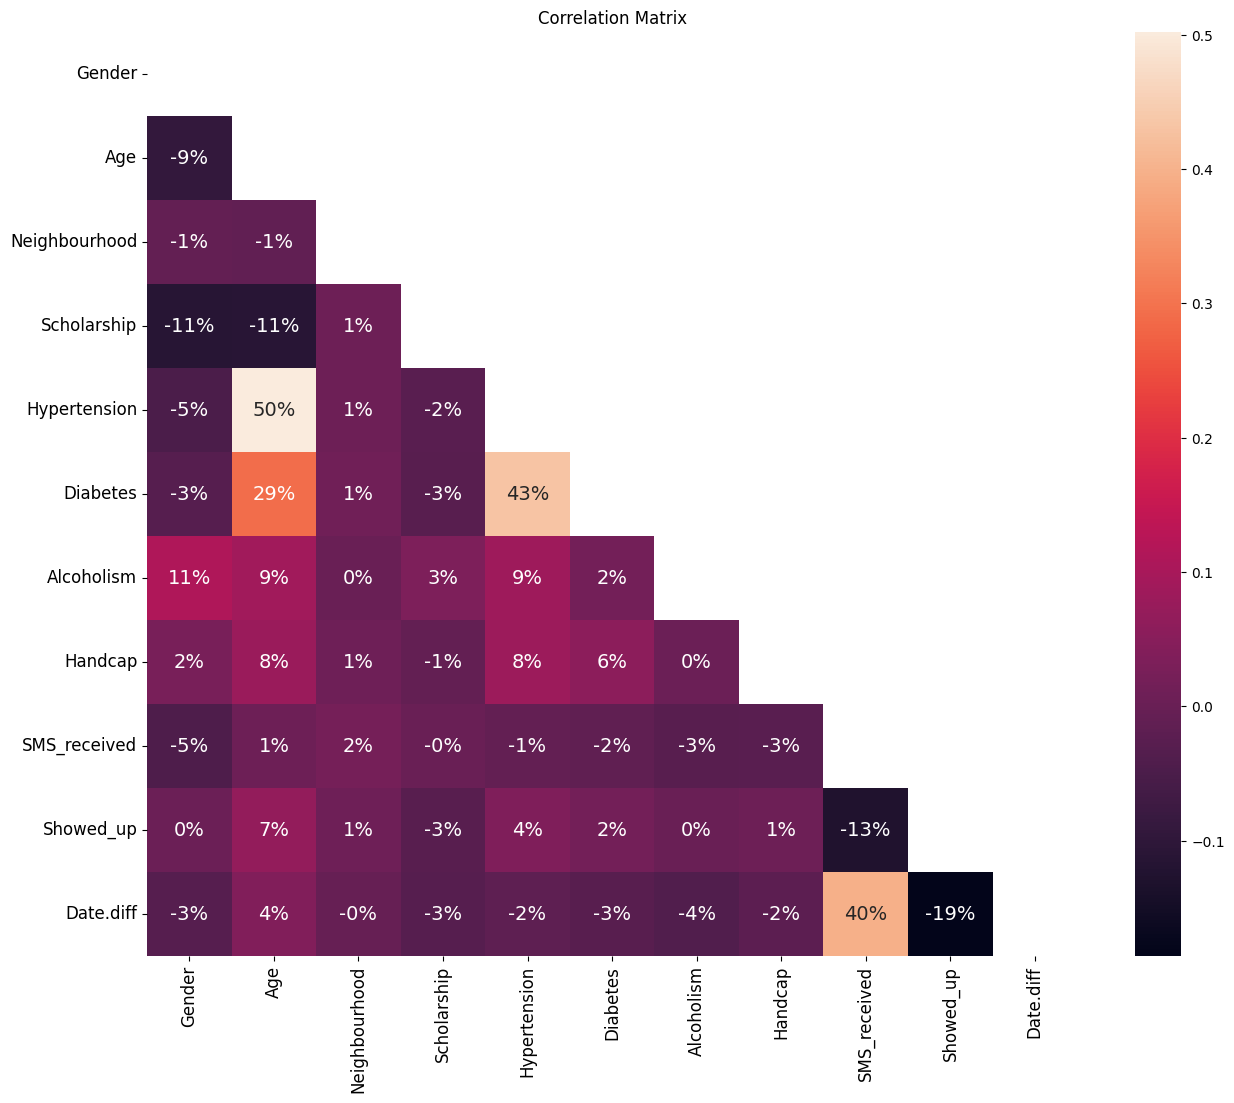

In [13]:
mask = np.zeros_like(correlation)
mask_check = np.triu_indices_from(mask)
mask[mask_check] = True

plt.figure(figsize = (15,12))
sns.heatmap(correlation, mask = mask, annot = True, fmt = "0.0%", annot_kws = {"size" : "14"})
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12)
plt.title("Correlation Matrix")
plt.show()

## Checking the distribution of dependent variable(Showed_Up) with selected Independent variables

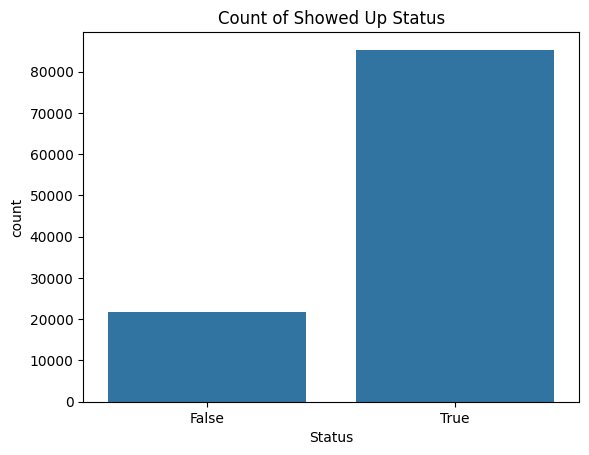

In [14]:
# for classification the DV is showed_up. Distribution of showed up
sns.countplot(df,x='Showed_up')
plt.title("Count of Showed Up Status")
plt.xlabel("Status")
plt.show()

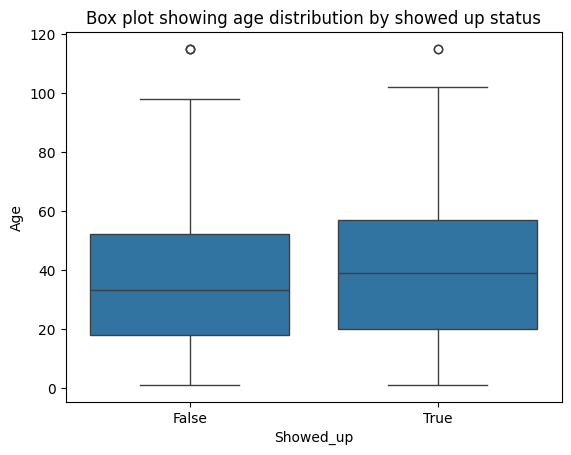

In [15]:
sns.boxplot(x='Showed_up', y='Age', data=df)
plt.title("Box plot showing age distribution by showed up status")
plt.show()

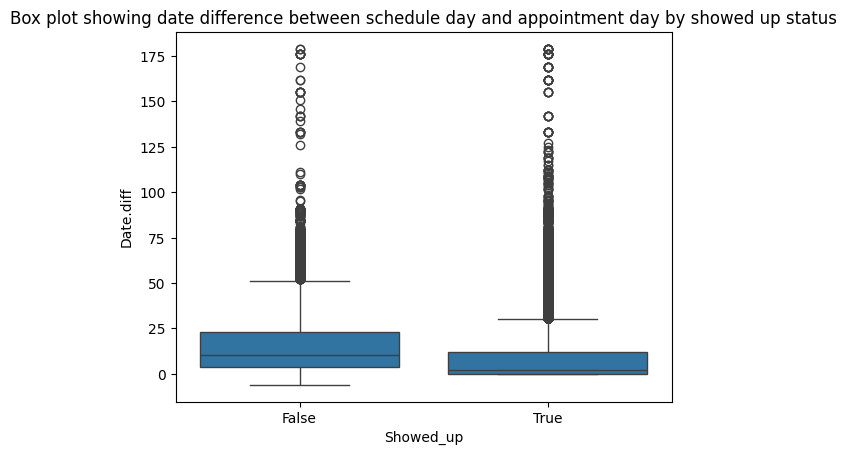

In [16]:
sns.boxplot(x='Showed_up', y='Date.diff', data=df)
plt.title("Box plot showing date difference between schedule day and appointment day by showed up status")
plt.show()

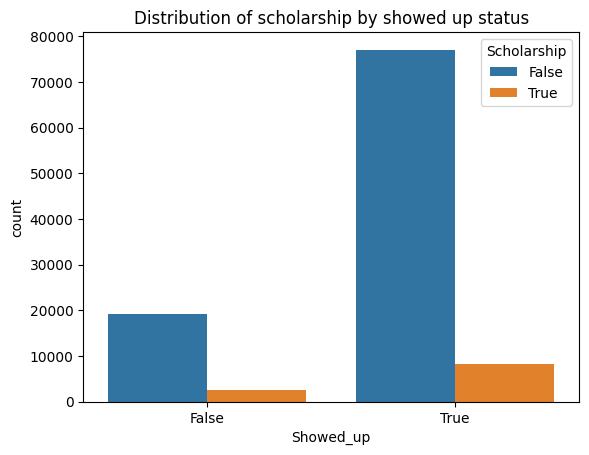

In [17]:
sns.countplot(df,x="Showed_up",hue="Scholarship")
plt.title("Distribution of scholarship by showed up status")
plt.show()

In [ ]:
sns.countplot(x='Showed_up', hue='Hypertension', data=df)
plt.title(" Hypertension distribution by showed up status")
plt.show()

In [ ]:
sns.countplot(x='Showed_up', hue='Diabetes', data=df)
plt.title("Diabetes distribution by showed up status")
plt.show()

In [ ]:
sns.countplot(x='Showed_up', hue='Alcoholism', data=df)
plt.title("Alcoholism distribution by showed up status")
plt.show()

In [ ]:
sns.countplot(x='Showed_up', hue='Handcap', data=df)
plt.title("Handicap distribution by showed up status")
plt.show()

__importing libraries__

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression  
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [19]:
df_copied = df.copy()

__scaling and encoding: Onehot and OrdinalEncoder__

In [20]:
numeric_features = ['Age', 'Date.diff']
categorical_features = [ 'Neighbourhood', 'Scholarship', 'Hypertension', 
                        'Diabetes',  'Handcap', 'SMS_received']


onehot_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first',handle_unknown='ignore'), categorical_features)
    ])

#X = preprocessor.fit_transform(df)


In [21]:
ordinal_preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),  
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features)
])

__defining dependent and independent variables__

In [22]:
x = df_copied.drop(['Showed_up','Gender','Alcoholism'],axis=1) 
y = df_copied['Showed_up']

__Data splitting , training and evaluation of models__

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

__model training and evaluation__

In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
#dictionary
models = {
    "Logistic Regression": (LogisticRegression(), onehot_preprocessor),
    "Random Forest": (RandomForestClassifier(), ordinal_preprocessor),
    "XGBoost": (XGBClassifier(eval_metric='logloss'), ordinal_preprocessor)
}

C:\Users\NANA\AppData\Roaming\Python\Python313\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Results for Logistic Regression:
              precision    recall  f1-score   support

       False       0.31      0.57      0.40      6524
        True       0.86      0.67      0.76     25573

    accuracy                           0.65     32097
   macro avg       0.58      0.62      0.58     32097
weighted avg       0.75      0.65      0.68     32097



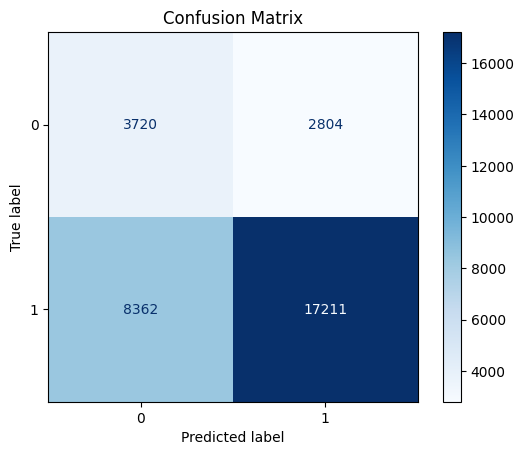

Results for Random Forest:
              precision    recall  f1-score   support

       False       0.35      0.35      0.35      6524
        True       0.83      0.83      0.83     25573

    accuracy                           0.73     32097
   macro avg       0.59      0.59      0.59     32097
weighted avg       0.73      0.73      0.73     32097



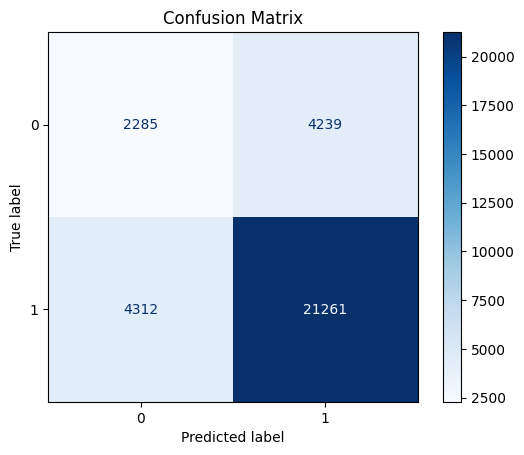

Results for XGBoost:
              precision    recall  f1-score   support

       False       0.37      0.33      0.35      6524
        True       0.83      0.86      0.85     25573

    accuracy                           0.75     32097
   macro avg       0.60      0.59      0.60     32097
weighted avg       0.74      0.75      0.74     32097



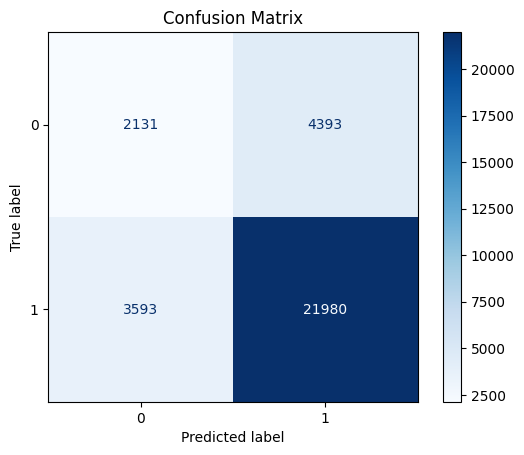

<Figure size 1000x800 with 0 Axes>

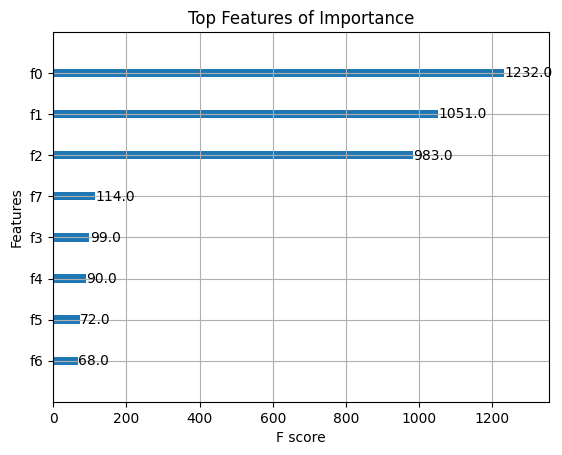

In [ ]:
for name, (model, preprocessor) in models.items():
    # Fit-transform training data, transform test data
    X_train_prep = preprocessor.fit_transform(X_train)
    X_test_prep = preprocessor.transform(X_test)
    
    # Apply SMOTE
    smote = SMOTE(sampling_strategy='minority', random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_prep, y_train)
    
    # Fit model
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_prep)
    print(f"Results for {name}:")
    print(classification_report(y_test, y_pred))

    """cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()
    """


if name == "XGBoost":
 import xgboost as xgb
# Plot feature importance for XGBoost model
 plt.figure(figsize=(10, 8))
 xgb.plot_importance(model, importance_type='weight', max_num_features=10, title="Top Features of Importance")
 plt.show()

## For Unsupervised Learning

In [27]:
df2 = df.copy()
X = df2.drop(columns=['Showed_up'])

In [28]:
numeric_features = ['Age', 'Date.diff']
categorical_features = [ 'Gender','Neighbourhood', 'Scholarship', 'Hypertension', 
                        'Diabetes',  'Alcoholism','Handcap', 'SMS_received']

#  Preprocess data: scale and encode
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first',handle_unknown='ignore'), categorical_features)
    ])

X = preprocessor.fit_transform(df2)

In [29]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


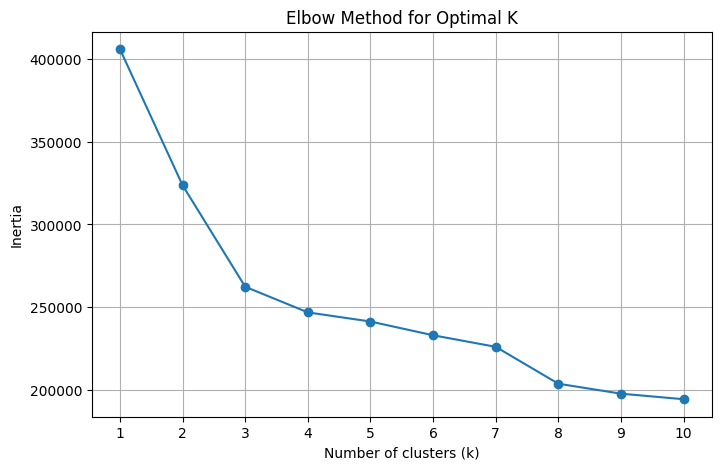

In [ ]:
#  Plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [31]:
# Apply K-Means with the chosen number of clusters ( 3)
optimal_k = 3 
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X)
df['Cluster'] = clusters

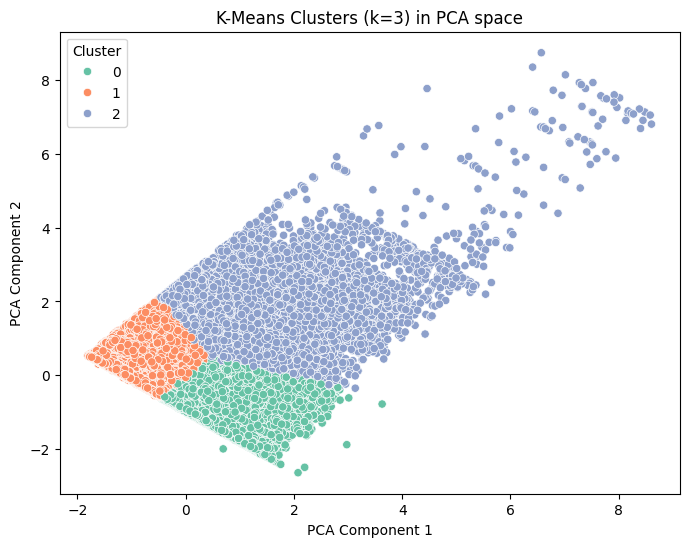

In [32]:
#  Reduce dimensions for visualization (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

#  Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2')
plt.title(f'K-Means Clusters (k={optimal_k}) in PCA space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [33]:
# Group by Cluster and look at the mean of each feature
cluster_profile = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_profile)


               Age  Scholarship  Hypertension  Diabetes  Alcoholism   Handcap  \
Cluster                                                                         
0        58.765284     0.065239      0.439111  0.162153    0.056539  0.031955   
1        19.939759     0.138554      0.013862  0.005920    0.012590  0.013903   
2        38.617658     0.084572      0.143123  0.043804    0.020570  0.012577   

         SMS_received  Showed_up  Date.diff  
Cluster                                      
0            0.265808   0.844797   4.974786  
1            0.259495   0.797807   5.080940  
2            0.665428   0.670012  39.074969  


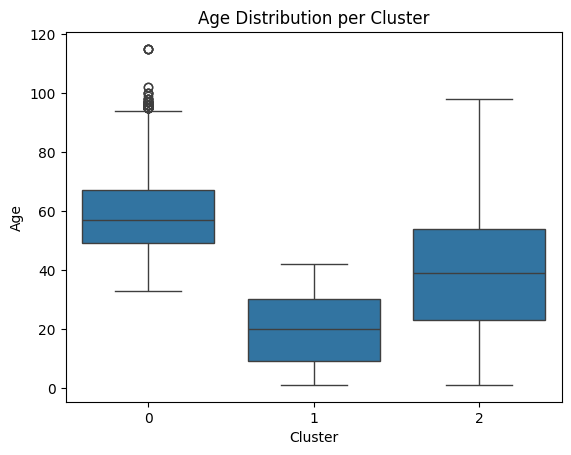

In [34]:
# Plot age distribution per cluster

sns.boxplot(x='Cluster', y='Age', data=df)
plt.title('Age Distribution per Cluster')
plt.show()


## Mixed Model

In [ ]:
# Define target and features (include Cluster as a feature)
X_mixed = df.drop(columns=['Showed_up'])  
y = df['Showed_up']



In [36]:
X_mixed.columns

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Date.diff',
       'Cluster'],
      dtype='object')

In [37]:
numeric_features = ['Age', 'Date.diff']
categorical_features = [ 'Neighbourhood', 'Scholarship', 'Hypertension', 
                        'Diabetes',  'Handcap', 'SMS_received','Cluster']


onehot_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first',handle_unknown='ignore'), categorical_features)
    ])

In [38]:
ordinal_preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),  
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features)
])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_mixed, y, test_size=0.3, random_state=42)

In [40]:
#dictionary
models = {
    "Logistic Regression": (LogisticRegression(), onehot_preprocessor),
    "Random Forest": (RandomForestClassifier(), ordinal_preprocessor),
    "XGBoost": (XGBClassifier(eval_metric='logloss'), ordinal_preprocessor)
}

C:\Users\NANA\AppData\Roaming\Python\Python313\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Results for Logistic Regression:
              precision    recall  f1-score   support

       False       0.31      0.58      0.41      6524
        True       0.86      0.67      0.75     25573

    accuracy                           0.65     32097
   macro avg       0.59      0.63      0.58     32097
weighted avg       0.75      0.65      0.68     32097

Results for Random Forest:
              precision    recall  f1-score   support

       False       0.35      0.33      0.34      6524
        True       0.83      0.84      0.84     25573

    accuracy                           0.74     32097
   macro avg       0.59      0.59      0.59     32097
weighted avg       0.73      0.74      0.73     32097

Results for XGBoost:
              precision    recall  f1-score   support

       False       0.37      0.35      0.36      6524
        True       0.84      0.85      0.84     25573

    accuracy                           0.75     32097
   macro avg       0.60      0.60      0.60    

<Figure size 1000x800 with 0 Axes>

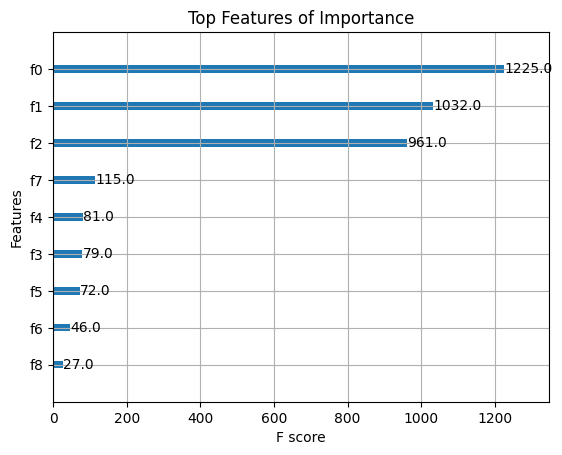

In [41]:
for name, (model, preprocessor) in models.items():
    # Fit-transform training data, transform test data
    X_train_prep = preprocessor.fit_transform(X_train)
    X_test_prep = preprocessor.transform(X_test)
    
    # Apply SMOTE
    smote = SMOTE(sampling_strategy='minority', random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_prep, y_train)
    
    # Fit model
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_prep)
    print(f"Results for {name}:")
    print(classification_report(y_test, y_pred))
    


if name == "XGBoost":
 import xgboost as xgb
# Plot feature importance for XGBoost model
 plt.figure(figsize=(10, 8))
 xgb.plot_importance(model, importance_type='weight', max_num_features=10, title="Top Features of Importance")
 plt.show()

In [42]:
print(df.groupby('Cluster')['Showed_up'].value_counts(normalize=True))


Cluster  Showed_up
0        True         0.844797
         False        0.155203
1        True         0.797807
         False        0.202193
2        True         0.670012
         False        0.329988
Name: proportion, dtype: float64
